In [2]:
#Maksimov Andrey MAEE'19

In [3]:
#Home Work 3

In [23]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib
import math
import sys

In [5]:
#Task4

df = pd.DataFrame.from_csv("goalies-2014-2016.csv", sep = ';', index_col = None) 
#Считываем CSV с необходимым параметром разделителя ';'

df.head()
#Посмотрим на внутренне устройство нашего Фрейма

,n,player,season,team,position,games_played,games_started,wins,losses,overtime_losses,...,saves,goals_against,save_percentage,goal_against_average,time_on_ice,shutouts,goals,assists,points,penalty_minutes
0,1,Cam Talbot,2016-17,EDM,G,73,73,42,22,8,...,1946,171,0.919,2.39,4294:00,7,0,0,0,4
1,2,Braden Holtby,2016-17,WSH,G,63,63,42,13,6,...,1563,127,0.925,2.07,3680:10,9,0,0,0,0
2,3,Sergei Bobrovsky,2016-17,CBJ,G,63,63,41,17,5,...,1727,127,0.931,2.06,3707:04,7,0,0,0,8
3,4,Devan Dubnyk,2016-17,MIN,G,65,63,40,19,5,...,1701,141,0.923,2.25,3758:00,5,0,0,0,10
4,5,Tuukka Rask,2016-17,BOS,G,65,64,37,20,5,...,1473,137,0.915,2.23,3679:30,8,0,2,2,0


In [6]:
df[['n','player', 'season', 'team', 'position', 'games_started']][:5]
#Считали 5 строк и 6 столбцов

,n,player,season,team,position,games_started
0,1,Cam Talbot,2016-17,EDM,G,73
1,2,Braden Holtby,2016-17,WSH,G,63
2,3,Sergei Bobrovsky,2016-17,CBJ,G,63
3,4,Devan Dubnyk,2016-17,MIN,G,63
4,5,Tuukka Rask,2016-17,BOS,G,64


In [7]:
#Теперь определим правильность save_percentage:

def check(df):
    check = 1
    check_abs = -1
    for i in range(0, len(df['save_percentage'])):
        true = df['save_percentage'][i]
        calc = round(df['saves'][i] / df['shots_against'][i],3)
        tmp_check_abs = math.fabs(df['save_percentage'][i] - df['saves'][i] / df['shots_against'][i])
        if tmp_check_abs != 0:
            if check_abs < tmp_check_abs:
                check_abs = tmp_check_abs
        #В calc будем сами высчитывать необходимые нам значения save_percentage для сравнения
        #Используем функцию round() для округления числа до необходимого знака после запятой
        if(true - calc > 0.001):
            print('Error')
            print(true)
            print(calc)
            check = 0
            break
    return check, check_abs

check_data, check_abs = check(df)

if check_data != 0:
    print('There are not problems with save_percentage')
    print(check_abs)

There are not problems with save_percentage
0.000593256059009506


/Users/andrey/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/andrey/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [8]:
#Вычислим среднее и стандартные отклонения

def middle_diff(df):
    middle_games = 0
    middle_goals = 0
    middle_perce = 0
    
    average_games = 0
    average_goals = 0
    average_perce = 0
    
    standard_games = 0
    standard_goals = 0
    standard_perce = 0
   
    amount = len(df['n'])
    for i in range(0, amount):
        middle_games = middle_games + df['games_played'][i]
        middle_goals = middle_goals + df['goals_against'][i]
        middle_perce = middle_perce + df['save_percentage'][i]
        
    middle_games = middle_games / amount
    middle_goals = middle_goals / amount
    middle_perce = middle_perce / amount
    #Вычисляем срднее арифметическое
   
    average_games = df['games_played'].mean()
    average_goals = df['goals_against'].mean()
    average_perce = df['save_percentage'].mean()
    #Вычисляем среднее значение
   
    
    for i in range(0, amount):
        standard_games = standard_games + (df['games_played'][i] - middle_games)**2
        standard_goals = standard_goals + (df['goals_against'][i] - middle_goals)**2
        standard_perce = standard_perce + (df['save_percentage'][i] - middle_perce)**2
        
    standard_games = math.sqrt((1 / (amount - 1)) * standard_games)
    standard_goals = math.sqrt((1 / (amount - 1)) * standard_goals)
    standard_perce = math.sqrt((1 / (amount - 1)) * standard_perce)
    #Вычисляем стандартное отклонение
    
    return average_games, average_goals, average_perce, standard_games, standard_goals, standard_perce

av_games, av_goals, av_perce, stand_games, stand_goals, stand_perce = middle_diff(df)

print(av_games)
print(av_goals)
print(av_perce)
print('\n')

print(stand_games)
print(stand_goals)
print(stand_perce)

28.476702508960575
67.60573476702508
0.901179211469534


22.28539530193931
53.351779174596096
0.07126001228217074


In [9]:
#Ответим на вопрос 4 подпункта

def player(df):
    n = 0
    player = str()
    save_percentage = 0
    for i in range(0, len(df['season'])):
        if df['season'][i] == '2016-17':
            if df['games_played'][i] > 40:
                if df['save_percentage'][i] > save_percentage:
                    n = i
                    player = df['player'][i]
                    save_percentage = df['save_percentage'][i]
    return n, player, save_percentage

#Проходимся по необходимым сталбцам(указанным в задании) и через if отбираем интересующие данные
        
n, player, save_percentage = player(df)
print(n)
print(player)
print(save_percentage)

2
Sergei Bobrovsky
0.931


In [10]:
#Найдем вратаря, который отразил наибольшее количество бросков в каждом сезоне. Будем отдельно проходиться по каждому
#сезону и находить необходимых игроков.

def saves(df):
    first_saves = 0
    first_number = 0
    
    second_saves = 0
    second_number = 0
    
    third_saves = 0
    third_number = 0
    
    for i in range(0, len(df['player'])):
        if df['season'][i] == '2014-15':
            if first_saves <= df['saves'][i]:
                first_saves = df['saves'][i]
                first_number = i
        if df['season'][i] == '2015-16':
            if second_saves <= df['saves'][i]:
                second_saves = df['saves'][i]
                second_number = i
        if df['season'][i] == '2016-17':
            if third_saves <= df['saves'][i]:
                third_saves = df['saves'][i]
                third_number = i
            
    return (df['season'][first_number], df['player'][first_number], first_saves,
            df['season'][second_number], df['player'][second_number], second_saves,
            df['season'][third_number], df['player'][third_number], third_saves)

f_seas, f_name, f_save, s_seas, s_name, s_save, t_seas, t_name, t_save = saves(df)

print(f_seas, f_name, f_save)
print(s_seas, s_name, s_save)
print(t_seas, t_name, t_save)

2014-15 Braden Holtby 1887
2015-16 Henrik Lundqvist 1788
2016-17 Cam Talbot 1946


In [11]:
def season(df):
    dm = df
    array = list()
    result = list()
    result_dict = dict()
    #Зададим словарь, в котором в дальнейшем будем хранить имя и суммарное количество побед, которые одержал данный игрок.
    dm = dm.sort_values(['player'])
    #Сортируем игрков, таким образом игроки, если принимали участие в 3 сезонах, будут отображаться, как 3 идущие подряд
    #строчки - в таком случае, нам будет необходимо просто пройтись по списку и отсеить игроков, для которых есть 3 подряд
    #идущие строчки
    
    for i in (dm['player']):
        array.append(i)
        if len(array) == 3:
            if array.count(i) == 3:
                result.append(i)
                array.clear()
            else:
                s = array.pop(0)
    
    for i in range(0, len(df['player'])):
        if result.count(df['player'][i]) != 0:
            result_dict[df['player'][i]] = 0
    #На данном этапе инициализируем наш словарь 0
                
    for i in range(0, len(df['player'])):
        if result.count(df['player'][i]) != 0:
            if df['wins'][i] >= 30: #Делаем проверку, что количесвто побед > 30
                result_dict[df['player'][i]] =  result_dict[df['player'][i]] + df['wins'][i]
            else:
                result_dict.pop(df['player'][i]) #Удаляем игрока из словаря, если количество побед <30
                n = result.index(df['player'][i]) #Удаляем игрока из list(), если количество побед <30
                result.pop(n)
    return result_dict

result = season(df)
print(result)

{'Braden Holtby': 131, 'Devan Dubnyk': 108, 'Tuukka Rask': 102, 'Corey Crawford': 99, 'Pekka Rinne': 106, 'Henrik Lundqvist': 96}


In [12]:
#Task 1

#Объявим дату глобально, чтобы ориентировать на какой-то конкретный DataSet(), а не на разный, так как используем
#np.random() 
X = np.random.randn(100,3)
y = X.dot(np.array([1,2,3])) + np.random.randn(100) 

y = y.reshape(100,1) #Сделаем reshape для удобства работы с данным форматом

In [13]:
#Для начала зададим класс, который будет содержать необходимые методы

class OLS:
    def __init__(self, y, X):
        self.y = y
        self.X = X

    #Посчитаем наши коэффициенты betta
    def beta(self):
        matrix_inv = np.linalg.inv(np.dot(self.X.transpose(), self.X))
        beta_score = np.dot(np.dot(matrix_inv, self.X.transpose()), self.y)

        return beta_score
    
    #Посчитаем нашу матрицу V, так как для перемножения матриц необходимо использовать np.dot(), то разобъем задачу перемножения
    #на несколько кусков, чтобы было значительно проще и нагляднее
    def V(self):
        n, k = self.X.shape
        matrix_inv = np.linalg.inv(np.dot(self.X.transpose(), self.X))
        
        coeff = 1 / (n - k)
        first = self.y - np.dot(self.X, self.beta())
        first = first.transpose()
        
        second = self.y - np.dot(self.X, self.beta())
        
        sigma_sqr = np.dot(first, second)
        sigma_sqr = coeff * sigma_sqr
        
        cov_matrix_beta = sigma_sqr * matrix_inv
                                      
        return cov_matrix_beta
    
    def predict(self, array):
        y_predict = np.dot(array.transpose(), self.beta())
        
        n, k = self.X.shape
        matrix_inv = np.linalg.inv(np.dot(self.X.transpose(), self.X))
        
        coeff = 1 / (n - k)
        first = self.y - np.dot(self.X, self.beta())
        first = first.transpose()
        
        second = self.y - np.dot(self.X, self.beta())
        
        sigma_sqr = np.dot(first, second)
        sigma_sqr = coeff * sigma_sqr
        
        V_for_y = np.dot(array.transpose(), matrix_inv)
        V_for_y = np.dot(V_for_y, array)
        V_for_y = 1 + V_for_y
        V_for_y = sigma_sqr * V_for_y

        return y_predict, V_for_y
        

In [14]:
OLS_regression = OLS(y,X)

beta_score = OLS_regression.beta()
print('OLS.beta()')
print(beta_score)

V = OLS_regression.V()
print('V')
print(V)

y_predict, V_for_y = OLS_regression.predict(np.array([1,0,1]))
print('predict')
print(y_predict)
print('V_for_y')
print(V_for_y)

OLS.beta()
[[ 0.96422467]
 [ 2.04993513]
 [ 2.9471924 ]]
V
[[ 0.00890536  0.00118055  0.00013066]
 [ 0.00118055  0.01049355 -0.00047645]
 [ 0.00013066 -0.00047645  0.01272566]]
predict
[ 3.91141707]
V_for_y
[[ 0.99209221]]


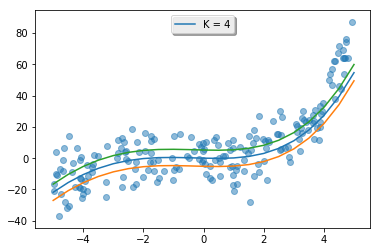

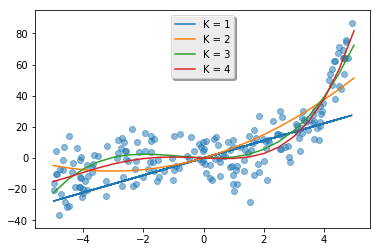

In [20]:
#Task 2

def regression_plot():
    array_beta = np.random.rand(11) #Зададим распределение для beta
    array_x = np.random.uniform(-5, 5, 200) #Теперь зададим распределение для array_x через uniform()
    array_u = 10 * np.random.randn(200) + 0 #Задаем нормальное распределение с установленными параметрами
    
    array_y = np.zeros((200,1))
    for i in range(0, 200):
        value = 0
        for k in range(0,11):
            value = value + array_beta[k] * (array_x[i]**k) / math.factorial(k)
        array_y[i] = value + array_u[i]
    
    array_x = array_x.reshape(200,1)
    
    #Выполним первый пункт и построим интересующий нас график
    plt.scatter(array_x, array_y, alpha = 0.5) 
    plt.show()
    
    #Возьмем данные числа, на основании которых уже будет строить предсказывания - контрольная выборка
    #Сразу сделаем его отсортирвоанным по x, чтобы plt.plot() выдавал график(последователно), а не просто набор соединенных точек
    array = [-5, -4.5, - 4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5]
    
    #Случай k = 1
    OLS_regression = OLS(array_y, array_x)
    y_predict1, V = OLS_regression.predict(array_x.transpose())
    fig, ax = plt.subplots()
    line1 = plt.plot(array_x, y_predict1, label = 'K = 1')
    legend = ax.legend(loc='upper center', shadow=True)
     
    #Случай k = 2
    array_x_model = np.zeros((200, 2))
    for i in range(0, 200):
        array_x_model[i][0] = array_x[i] #Необходимо чтобы задать, как и в Task1 X таким образом чтобы у нас был набор betta в размере k штку
        array_x_model[i][1] = array_x[i]**2
        
    #Массив, по которому мы будем делать предикт, тоже необходимо привести к правильному виду
    array_for_predict = np.zeros((21, 2))
    for i in range(0, 21):
        array_for_predict[i][0] = array[i]
        array_for_predict[i][1] = array[i]**2
        
    OLS_regression = OLS(array_y, array_x_model)
    y_predict2, V = OLS_regression.predict(array_for_predict.transpose())
    plt.plot(array, y_predict2.reshape(21), label = 'K = 2')
    legend = ax.legend(loc='upper center', shadow=True)

    #Случай k = 3
    array_x_model = np.zeros((200, 3))
    for i in range(0, 200):
        array_x_model[i][0] = array_x[i]
        array_x_model[i][1] = array_x[i]**2
        array_x_model[i][2] = array_x[i]**3
        
    array_for_predict = np.zeros((21, 3))
    for i in range(0, 21):
        array_for_predict[i][0] = array[i]
        array_for_predict[i][1] = array[i]**2
        array_for_predict[i][2] = array[i]**3
    
    OLS_regression = OLS(array_y, array_x_model)
    y_predict3, V = OLS_regression.predict(array_for_predict.transpose())
    plt.plot(array, y_predict3.reshape(21), label = 'K = 3')
    legend = ax.legend(loc='upper center', shadow=True)
    
    #Случай k = 4
    array_x_model = np.zeros((200, 4))
    for i in range(0, 200):
        array_x_model[i][0] = array_x[i]
        array_x_model[i][1] = array_x[i]**2
        array_x_model[i][2] = array_x[i]**3
        array_x_model[i][3] = array_x[i]**4
        
    array_for_predict = np.zeros((21, 4))
    for i in range(0, 21):
        array_for_predict[i][0] = array[i]
        array_for_predict[i][1] = array[i]**2
        array_for_predict[i][2] = array[i]**3
        array_for_predict[i][3] = array[i]**4
    
    OLS_regression = OLS(array_y, array_x_model)
    y_predict4, V = OLS_regression.predict(array_for_predict.transpose())
    plt.plot(array, y_predict4.reshape(21), label = 'K = 4')
    legend = ax.legend(loc='upper center', shadow=True)
    
    
    plt.new_figure_manager
    
    from scipy import stats
    #Зададим доверительный 90-процентный интервал самым обычным способом, бек каких-либо усовершетствований
    #Так как нам необходимо строить для каждого y, а не для для среднего - будем просто в два листа скидывать
    #значения и уже по ним построим графики

    alpha = 1 - 0.9
    z = abs(stats.norm.ppf(alpha/2))

    sigma = 10
    n = 10
    SE = sigma/math.sqrt(n)
    
    low_list = []
    high_list = []
    
    for i in range(0, 21):
        ybar = y_predict4[i][0]
         
        low = ybar - z * SE
        high = ybar + z * SE
        
        low_list.append(low)
        high_list.append(high)
        
    #print(low_list)
    #print(high_list)
    
    plt.scatter(array_x, array_y, alpha = 0.5) 
    plt.show()
    fig, ax = plt.subplots()
    true = plt.plot(array, y_predict4.reshape(21), label = 'K = 4')
    legend = ax.legend(loc='upper center', shadow=True)
    low = plt.plot(array, low_list) #Нижняя граница доверительного интервала
    high = plt.plot(array, high_list) #Верхняя граница доверительного интервала
    #ЗАКРАСИТЬ НЕ ПОЛУЧИЛОСЬ


    return array_y
    
array_y = regression_plot()
    

In [29]:
#Task 3

#Будем действовать аналогично последнему пункту в Task 2

def matrix():
    matrix_array = np.random.randn(100, 100)

    bools = []
    counter_true = 0
    z = stats.t.ppf(0.9,len(matrix_array))
    mean_array = matrix_array.mean(axis = 0)
    standart = matrix_array.std(axis = 0)
    high = mean_array + standart * z / np.sqrt(len(mean_array))
    low = mean_array - standart * z / np.sqrt(len(mean_array))

    interv = np.vstack((low, high))
    for i in range(0, len(high)):
        k = np.any(0 < high[i] and 0 > low[i], axis = 0)
        bools.append(k)
        if k:
            counter_true = counter_true + 1
    print(bools)
    print(counter_true)        
        
    bools_r = []
    counter_true_r = 0
    mean_array_r = matrix_array.mean(axis = 1)
    standart_r = matrix_array.std(axis = 1)    
    high_r = mean_array_r + standart_r * z / np.sqrt(len(mean_array_r))
    low_r = mean_array_r - standart_r * z / np.sqrt(len(mean_array_r))

    for i in range(0, len(high_r)):
        k=np.any(0 < high_r[i] and 0 > low_r[i], axis = 0)
        bools_r.append(k)
        if k:
            counter_true_r = counter_true_r + 1
    print(bools_r)
    print(counter_true_r)        
    
matrix()

[True, True, True, False, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, False, False, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, False, True, True, True, False, True, True, False, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, False, True, True, True, True, True, True, True, True, False, False, False, True, True, True, True, True, False, True, True, False, True, False, True]
77
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True